In [1]:
#SKIN CANCER

In [1]:
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

In [2]:
benign = cv2.imread('skin-cancer-malignant-vs-benign/train/benign/3.jpg')

In [3]:
benign = cv2.cvtColor(benign,cv2.COLOR_BGR2RGB)

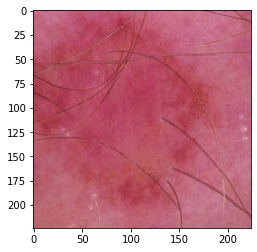

In [4]:
plt.imshow(benign)

In [5]:
benign.shape

(224, 224, 3)

In [6]:
malignant = cv2.imread('skin-cancer-malignant-vs-benign/train/malignant/2.jpg')

In [7]:
malignant = cv2.cvtColor(malignant,cv2.COLOR_BGR2RGB)

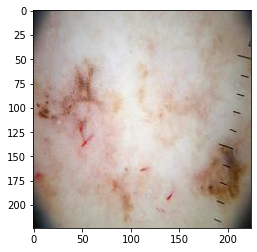

In [8]:
plt.imshow(malignant)

In [9]:
malignant.shape

(224, 224, 3)

In [10]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [11]:
image_gen = ImageDataGenerator(rotation_range=30,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              rescale=1/255,
                              shear_range=0.2,
                              zoom_range=0.2,
                              horizontal_flip=True,
                              fill_mode='nearest')

In [12]:
xyz=image_gen.random_transform(malignant)
xyz.shape

(224, 224, 3)

In [13]:
image_gen.flow_from_directory('skin-cancer-malignant-vs-benign/train',target_size=(224,224))

Found 2637 images belonging to 2 classes.


In [14]:
inputshape=(224,224,3)

In [15]:
from keras.models import Sequential

In [16]:
from keras.layers import Dense, MaxPooling2D, Conv2D, Flatten, Activation, Dropout

In [17]:
model = Sequential()

In [18]:
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(224,224,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(224,224,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(224,224,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.2))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics = ['accuracy'])

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 52, 52, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 26, 26, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 43264)            

In [20]:
batch_size = 16

train_image_gen = image_gen.flow_from_directory('skin-cancer-malignant-vs-benign/train',
                                               target_size=(224,224),
                                               class_mode='binary')

Found 2637 images belonging to 2 classes.


In [21]:
test_image_gen = image_gen.flow_from_directory('skin-cancer-malignant-vs-benign/test',
                                               target_size=(224,224),
                                               class_mode='binary')

Found 660 images belonging to 2 classes.


In [23]:
train_image_gen.class_indices

{'benign': 0, 'malignant': 1}

In [24]:
result = model.fit_generator(train_image_gen,epochs=100,steps_per_epoch=5,
                            validation_data=test_image_gen,validation_steps=2)

Epoch 1/100
5/5 [==============================] - 15s 3s/step - loss: 1.5210 - accuracy: 0.5188 - val_loss: 0.7953 - val_accuracy: 0.3906
Epoch 2/100
5/5 [==============================] - 12s 2s/step - loss: 0.7122 - accuracy: 0.5250 - val_loss: 0.6740 - val_accuracy: 0.4219
Epoch 3/100
5/5 [==============================] - 11s 2s/step - loss: 0.6783 - accuracy: 0.6812 - val_loss: 0.6440 - val_accuracy: 0.7500
Epoch 4/100
5/5 [==============================] - 11s 2s/step - loss: 0.6741 - accuracy: 0.6750 - val_loss: 0.7461 - val_accuracy: 0.5781
Epoch 5/100
5/5 [==============================] - 10s 2s/step - loss: 0.6736 - accuracy: 0.5938 - val_loss: 0.6753 - val_accuracy: 0.5625
Epoch 6/100
5/5 [==============================] - 10s 2s/step - loss: 0.6349 - accuracy: 0.5875 - val_loss: 0.6121 - val_accuracy: 0.5156
Epoch 7/100
5/5 [==============================] - 9s 2s/step - loss: 0.6412 - accuracy: 0.5887 - val_loss: 0.5857 - val_accuracy: 0.5000
Epoch 8/100
5/5 [===========

5/5 [==============================] - 10s 2s/step - loss: 0.2854 - accuracy: 0.8813 - val_loss: 0.3197 - val_accuracy: 0.8438
Epoch 60/100
5/5 [==============================] - 10s 2s/step - loss: 0.4287 - accuracy: 0.8188 - val_loss: 0.2221 - val_accuracy: 0.9062
Epoch 61/100
5/5 [==============================] - 10s 2s/step - loss: 0.4934 - accuracy: 0.7750 - val_loss: 0.4035 - val_accuracy: 0.8281
Epoch 62/100
5/5 [==============================] - 10s 2s/step - loss: 0.4433 - accuracy: 0.7688 - val_loss: 0.3741 - val_accuracy: 0.8281
Epoch 63/100
5/5 [==============================] - 10s 2s/step - loss: 0.4489 - accuracy: 0.8062 - val_loss: 0.4671 - val_accuracy: 0.6923
Epoch 64/100
5/5 [==============================] - 12s 2s/step - loss: 0.4201 - accuracy: 0.8188 - val_loss: 0.4466 - val_accuracy: 0.7188
Epoch 65/100
5/5 [==============================] - 11s 2s/step - loss: 0.4121 - accuracy: 0.7688 - val_loss: 0.4687 - val_accuracy: 0.7188
Epoch 66/100
5/5 [===============

In [25]:
result.history['accuracy']

[0.51875,
 0.525,
 0.68125,
 0.675,
 0.59375,
 0.5875,
 0.5886525,
 0.6125,
 0.6625,
 0.7,
 0.61875,
 0.7375,
 0.7375,
 0.76875,
 0.70625,
 0.7875,
 0.76875,
 0.8625,
 0.7446808,
 0.75625,
 0.78125,
 0.7125,
 0.79375,
 0.7875,
 0.775,
 0.8375,
 0.775,
 0.78125,
 0.81875,
 0.75625,
 0.825,
 0.80625,
 0.75,
 0.73758864,
 0.78125,
 0.75625,
 0.8375,
 0.7125,
 0.70625,
 0.8,
 0.8,
 0.81875,
 0.8,
 0.75,
 0.75625,
 0.8125,
 0.79375,
 0.76875,
 0.78125,
 0.775,
 0.7125,
 0.8125,
 0.81875,
 0.78723407,
 0.75625,
 0.76875,
 0.75,
 0.8375,
 0.88125,
 0.81875,
 0.775,
 0.76875,
 0.80625,
 0.81875,
 0.76875,
 0.78125,
 0.81875,
 0.81875,
 0.83125,
 0.8,
 0.7875,
 0.76875,
 0.8,
 0.7659575,
 0.73125,
 0.7875,
 0.8375,
 0.79375,
 0.78125,
 0.80625,
 0.825,
 0.75625,
 0.79375,
 0.8,
 0.79375,
 0.78125,
 0.81875,
 0.80625,
 0.83125,
 0.78125,
 0.83125,
 0.79375,
 0.75625,
 0.84375,
 0.825,
 0.76875,
 0.83687943,
 0.8125,
 0.7625,
 0.86875]

In [92]:
import matplotlib.pyplot as plt
%matplotlib inline

In [93]:
hist = model.history.history

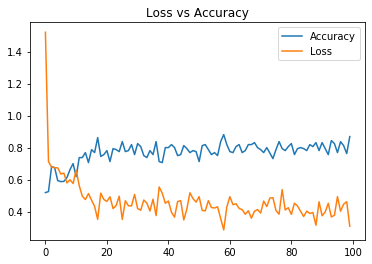

In [94]:
plt.figure()
plt.plot(hist['accuracy'],label='Accuracy')
plt.plot(hist['loss'],label='Loss')
plt.title('Loss vs Accuracy')
plt.legend()
plt.show()

Testing the Model

In [82]:
benign_test = 'skin-cancer-malignant-vs-benign/test/benign/1018.jpg'

In [69]:
from keras.preprocessing import image

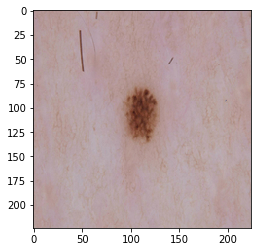

In [83]:
test_img = image.load_img(benign_test,target_size=(224,224))
plt.imshow(test_img)

In [84]:
test_img = image.img_to_array(test_img)

In [85]:
test_img.shape

(224, 224, 3)

In [58]:
import numpy as np

In [86]:
test_img = np.expand_dims(test_img,axis=0)

In [87]:
test_img.shape

(1, 224, 224, 3)

In [88]:
test_img = test_img/255

In [89]:
model.predict_classes(test_img)

array([[0]], dtype=int32)

In [90]:
model.predict(test_img)

array([[0.44860536]], dtype=float32)

In [91]:
model.save('skinCancerDoctor.h5')